# Challenge Human Activity Data Set Exploration
In this notebook, we explore the compiled human activity data set from the data collected by groups of students with mobile phones.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm

Let's define the converters to load the time series data.

In [3]:
np_cols = ["x-acc", "y-acc", "z-acc", "x-gyro", "y-gyro", "z-gyro", "x-mag", "y-mag", "z-mag", "change_points", "activities", "lat", "lon", "speed"]
converters = {col : lambda val: None if len(val) == 0 else np.array(eval(val)) for col in np_cols}

Let's load the the annotated time series data.

In [4]:
df = pd.read_csv("har_challenge_master.csv.gz", converters=converters, compression="gzip")

In [5]:
df.tail()

,location,subject,routine,x-acc,y-acc,z-acc,x-gyro,y-gyro,z-gyro,x-mag,y-mag,z-mag,lat,lon,speed,change_points,activities
245,outdoor,8,3,"[-9.188046, -9.188046, -9.188046, -10.248507, ...","[-1.138941, -1.138941, -1.138941, -1.335141000...","[3.337362, 3.337362, 3.337362, 4.2016230000000...",None,None,None,"[47.1875, 47.1875, 47.1875, 47.16700819672131,...","[20.9375, 20.9375, 20.9375, 21.014344262295083...","[4.1875, 4.1875, 4.1875, 4.192622950819672, 4....","[52.56558905, 52.56558905, 52.56558905, 52.565...","[13.42318936, 13.42318936, 13.42318936, 13.423...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[calf stretch]
246,outdoor,8,3,"[-4.372753, -4.476303, -4.381197631578948, -3....","[2.01396575, 2.199402, 1.9802775789473686, 0.8...","[9.04293975, 9.266526, 9.283151368421054, 9.36...",None,None,None,"[33.1875, 32.458333333333336, 31.875, 31.875, ...","[13.5, 13.604166666666666, 13.6875, 13.6875, 1...","[-32.4375, -33.09722222222222, -33.625, -33.62...","[52.56557981, 52.56557981, 52.56557981, 52.565...","[13.4231774, 13.4231774, 13.4231774, 13.423177...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[cobra pose]
247,outdoor,8,3,"[-3.7986159375, -4.6821290625000005, -4.947183...","[0.152055, 0.397305, 0.47088, 0.50790574285714...","[10.1234295, 9.706504500000001, 9.581427000000...",None,None,None,"[25.5625, 25.5625, 25.5625, 25.5625, 25.5625, ...","[15.5625, 15.5625, 15.5625, 15.5625, 15.5625, ...","[-38.25, -38.25, -38.25, -38.25, -38.25, -37.9...","[52.56557981, 52.56557981, 52.56557981, 52.565...","[13.4231774, 13.4231774, 13.4231774, 13.423177...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[529, 1778]","[transition, pigeon stretch left, transition]"
248,outdoor,8,3,"[-4.947183, -3.6522630000000005, -3.6522630000...","[1.138941, 0.825021, 0.825021, 0.825021, -0.03...","[-9.266526, -9.109566000000001, -9.10956600000...",None,None,None,"[-2.1875, -2.0646929824561404, -1.889254385964...","[-15.125, -15.109649122807017, -15.08771929824...","[50.125, 50.094298245614034, 50.05043859649122...","[52.56557981, 52.56557981, 52.56557981, 52.565...","[13.4231774, 13.4231774, 13.4231774, 13.423177...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[],[pigeon stretch right]
249,outdoor,8,3,"[-4.083903, -4.162383, -4.162383, -3.648058714...","[1.3351410000000001, 1.570581, 1.570581, 1.374...","[-9.160017428571429, -9.227286000000001, -9.22...",None,None,None,"[-1.75, -1.6436170212765957, -1.51063829787234...","[-15.5, -15.563829787234043, -15.6436170212765...","[49.8125, 49.74867021276596, 49.6688829787234,...","[52.56557981, 52.56557981, 52.56557981, 52.565...","[13.4231774, 13.4231774, 13.4231774, 13.423177...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[3533],"[change break, run]"


Number of Datasets without any Change Points

In [6]:
df[df["change_points"].apply(lambda x : len(x)==0)].count()

location         31
subject          31
routine          31
x-acc            31
y-acc            31
z-acc            31
x-gyro            5
y-gyro            5
z-gyro            5
x-mag            31
y-mag            31
z-mag            31
lat              26
lon              26
speed            26
change_points    31
activities       31
dtype: int64

Let's define a function to visualise some example multivariate recordings.

In [7]:
def plot_activity_data(
    ts_name, sensor_names, T, cps, show=True, save_path=None, sample_rate = 50, font_size=14):
    plt.clf()
    fig, axes = plt.subplots(len(T), sharex=True, gridspec_kw={'hspace': .15}, figsize=(20, len(T) * 1))
    
    for ts, sensor, ax in zip(T, sensor_names, axes):
        if ts is not None:
            segments = [0] + cps.tolist() + [ts.shape[0]]
            for idx in np.arange(0, len(segments)-1):
                ax.plot(np.arange(segments[idx], segments[idx+1]), ts[segments[idx]:segments[idx+1]])
            
        ax.set_ylabel(sensor, fontsize=font_size)
            
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(font_size)

        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(font_size)

    axes[0].set_title(ts_name, fontsize=font_size)
    axes[-1].set_xticklabels([f"{int(tick / sample_rate)}s" for tick in  axes[-1].get_xticks()])

    # if true_cps is not None:
        # ax.legend(prop={'size': font_size})
    plt.tight_layout()
    
    if show is True:
        plt.show()

    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight")
        
    return ax

Now, let's select an examplary subject and routine (0-249) and visualise the corresponding recording.

/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_30748/2195214545.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[-1].set_xticklabels([f"{int(tick / sample_rate)}s" for tick in  axes[-1].get_xticks()])
/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_30748/2195214545.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

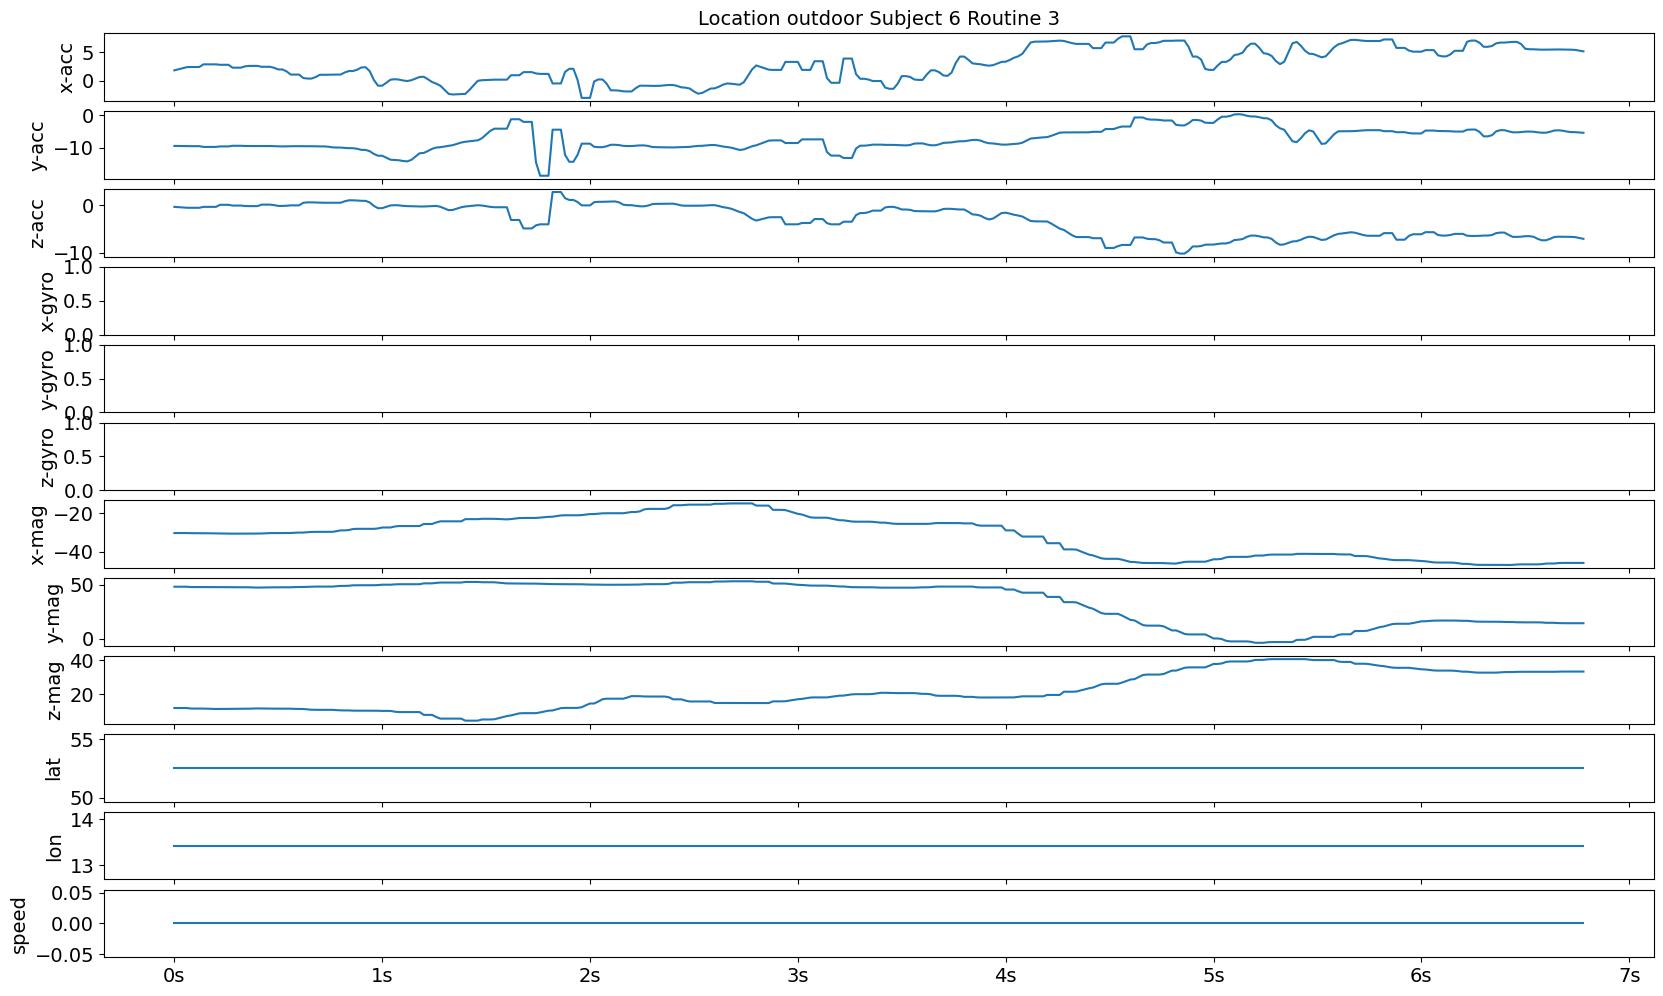

Activities (total=1): ['transition']


In [8]:
selection = 213
row = df.iloc[selection,:]
plot_activity_data(f"Location {row.location} Subject {row.subject} Routine {row.routine}", df.columns[3:15], row.iloc[3:15], row.change_points)
print(f"Activities (total={len(row.activities)}): {row.activities}")

Activities (total=6): ['jumping jacks' 'downtoplank' 'jumping jacks' 'rest' 'downtoplank'
 'sit ups']


/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_12308/2195214545.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[-1].set_xticklabels([f"{int(tick / sample_rate)}s" for tick in  axes[-1].get_xticks()])
/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_12308/2195214545.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 432x288 with 0 Axes>

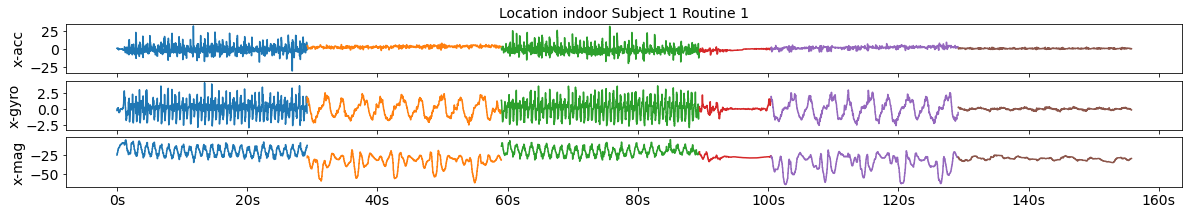

In [17]:
selection = 0
sensors = np.array([3,6,9])
row = df.iloc[selection,:]
plot_activity_data(f"Location {row.location} Subject {row.subject} Routine {row.routine}", df.columns[sensors], row.iloc[sensors], row.change_points, show=False, save_path="example.pdf")
print(f"Activities (total={len(row.activities)}): {row.activities}")
# colors = ("C0", "C1", "C0", "C2", "C1", "C3")

In [18]:
row.change_points / 50

array([ 29.22,  59.04,  89.46, 100.44, 129.2 ])

Let's visualize by time series length, activity length and amount of change points.

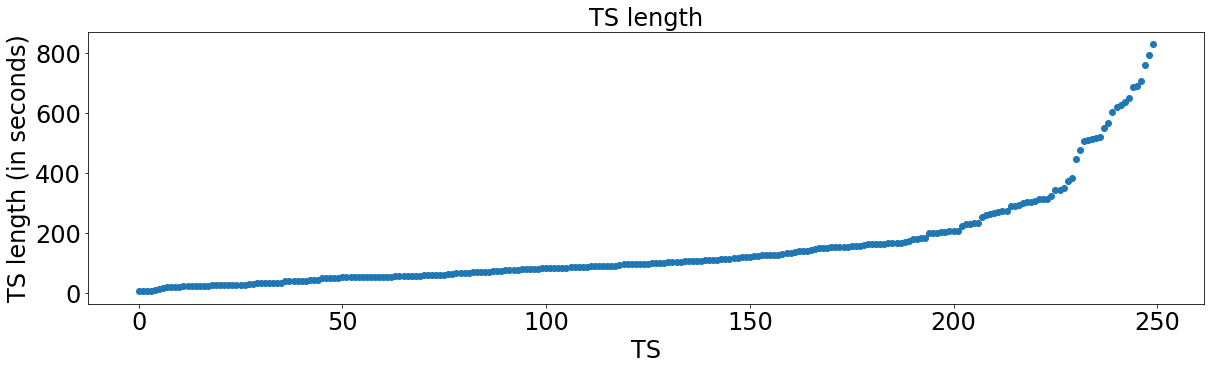

In [19]:
fontsize = 24
_, ax = plt.subplots(1, figsize=(20,5))

tslen_arg_sorted = np.argsort(df["x-acc"].apply(len))
ax.scatter(np.arange(0, df.shape[0]), df["x-acc"].apply(len).iloc[tslen_arg_sorted])

ax.set_xlabel("TS", fontsize=fontsize)
ax.set_ylabel("TS length (in seconds)", fontsize=fontsize)
ax.set_title("TS length", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_yticks(np.arange(0, 40_000+1, 10_000))
sample_rate = 50
ax.set_yticklabels(labels=[f"{round((x / 50))}" for x in np.arange(0, 40_000+1, 10_000)])
plt.show()

/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_12308/2980248175.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  activities, alens = np.array(list(activity_lengths.keys())), np.array(list(activity_lengths.values()))


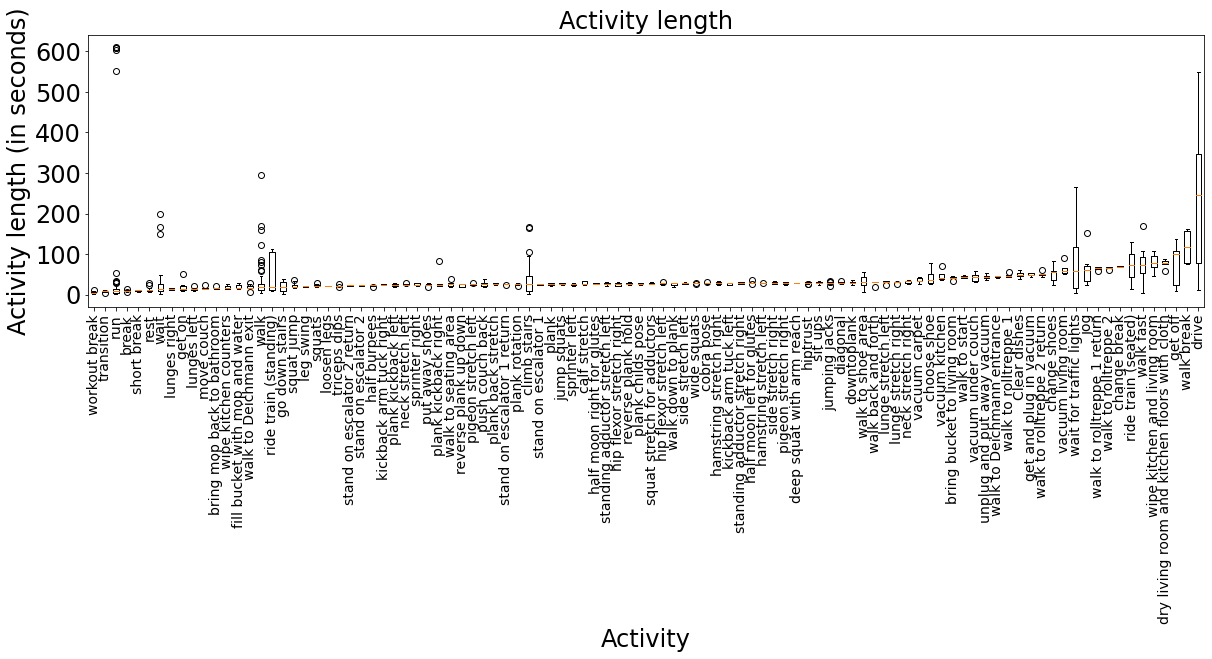

In [20]:
fontsize = 24
activity_lengths = dict()

for _, row in df.iterrows():
    cps = [0] + row.change_points.tolist() + [row["x-acc"].shape[0]]
    alens = np.diff(cps)
    
    for a, alen in zip(row.activities, alens):
        if a not in activity_lengths:
            activity_lengths[a] = list()
            
        activity_lengths[a].append(alen)
        
activities, alens = np.array(list(activity_lengths.keys())), np.array(list(activity_lengths.values()))
idxsort = np.argsort([np.median(x) for x in alens])

_, ax = plt.subplots(1, figsize=(20,5))
# ax.scatter(np.arange(len(activity_lengths)), np.sort(activity_lengths))
ax.boxplot(alens[idxsort])

ax.set_xlabel("Activity", fontsize=fontsize)
ax.set_ylabel("Activity length (in seconds)", fontsize=fontsize)
ax.set_title("Activity length", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticklabels(activities[idxsort], rotation=90, fontsize=14)

ax.set_yticks(np.arange(0, 30_000+1, 5_000))
sample_rate = 50
ax.set_yticklabels(labels=[f"{round(x/sample_rate)}" for x in np.arange(0, 30_000+1, 5_000)])
    
plt.show()

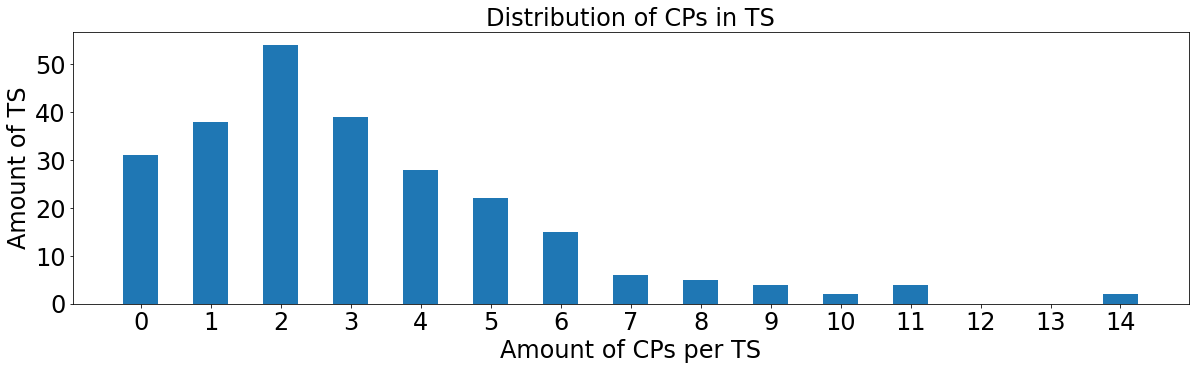

In [21]:
fontsize = 24

change_points, counts = np.unique(df.change_points.apply(len), return_counts=True)
_, ax = plt.subplots(1, figsize=(20,5))
ax.bar(change_points, counts, width=.5)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xlabel("Amount of CPs per TS", fontsize=fontsize)
ax.set_ylabel("Amount of TS", fontsize=fontsize)
ax.set_title("Distribution of CPs in TS", fontsize=fontsize)

ax.set_xticks(np.arange(0, 14+1, 1))

plt.show()